## Preparing the data for the ML pipeline with Sratified Shuffle Split

In [2]:
import pandas as pd
df=pd.read_csv("F:/Data_BachelorHES/5.Dataset_preparation/1.5sSegments/metadata.csv")

In [4]:
durationCount=df['duration'].value_counts().sort_index(ascending=False)
print(durationCount)

duration
5.00124    981
5.00122    843
4.96790      2
4.96788      3
4.83452      1
4.33440      2
4.00098      1
3.83428      1
3.66756      1
3.50086      1
3.33416      1
3.16744      1
2.20054      1
2.00050      1
0.83356      2
0.16670      1
Name: count, dtype: int64


In [10]:
labels_count=df['label'].value_counts().sort_index()
print(labels_count, "\nNumber of labels :", len(labels_count))

label
10_T02 M06 (VHM 309-12)/      450
11_T03 M06 (VHM 309-6)/       238
12_T06 M06 (VHM 309-3)/       217
13_T23 M06 (CHANF8)/          175
14_T22 M06 (CHANF3)/            5
1_T07 M06 (MECHE MD D4.2)/      5
2_T02 M06 (VHM 309-12)/       281
3_T14 M06 (MECHE5.3)/          45
4_T08 M06 (MECHE3.7 MD)/      224
5_T09 M06 (MECHE4.6 MD)/       66
6_T19 M06 (MECHE MD D4.8)/     17
7_T10 M06 (MECHE5.5 MD)/       58
8_T05 M06 (MECHE MD D5.8)/     16
9_T24 M06 (FRSURF50X5)/        46
Name: count, dtype: int64 
Number of labels : 14


In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
X=df[['sound', 'accelX', 'accelY', 'accelZ']]
Y=df['label']

trainSerie=pd.Series(np.nan, index=list(Y.unique()))
trainDf=pd.DataFrame(trainSerie , columns=['Init'])
testDf=pd.DataFrame(trainSerie , columns=['Init'])
del trainSerie

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
foldData=[]
for i, (train_index, test_index) in enumerate(sss.split(X,Y)):
    foldData.append((train_index, test_index))
    print(f"Fold {i} : {len(train_index)} training samples, {len(test_index)} testing samples")
    classTrain=Y[train_index].value_counts()
    classTrain=classTrain/len(train_index)
    trainDf[f"Fold {i}" ]=classTrain

    classTest=Y[test_index].value_counts()
    classTest=classTest/len(test_index)
    testDf[f"Fold {i}" ]=classTest

trainDf.drop(columns='Init', inplace=True)
testDf.drop(columns='Init', inplace=True)
del classTrain, classTest, i, train_index, test_index, sss, StratifiedShuffleSplit, Y

Fold 0 : 1474 training samples, 369 testing samples
Fold 1 : 1474 training samples, 369 testing samples
Fold 2 : 1474 training samples, 369 testing samples
Fold 3 : 1474 training samples, 369 testing samples
Fold 4 : 1474 training samples, 369 testing samples


In [14]:
#Adding label number to each dataframe
labels=[]
for label in list(testDf.index):
    labels.append(int(label.split("_")[0]))
testDf['Label']=labels

labels=[]
for label in list(trainDf.index):
    labels.append(int(label.split("_")[0]))
trainDf['Label']=labels

labels=[]
for label in list(labels_count.index):
    labels.append(int(label.split("_")[0]))
labelsCount=pd.DataFrame(labels_count)
labelsCount['Label']=labels
del labels, label

Total samples : 1843
Total samples : 1843
Total samples : 1843
Total samples : 1843
Total samples : 1843


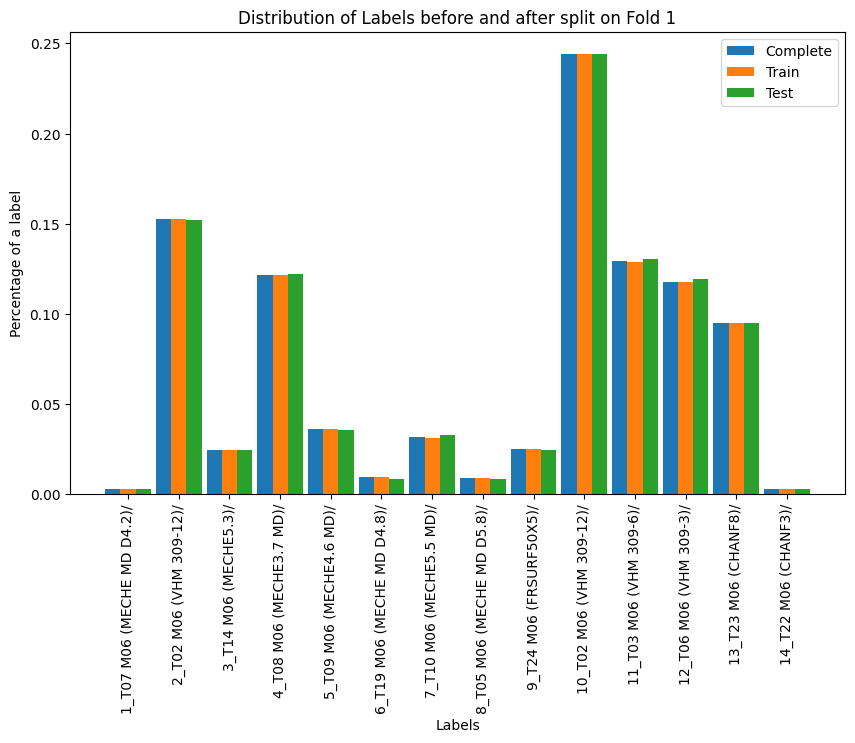

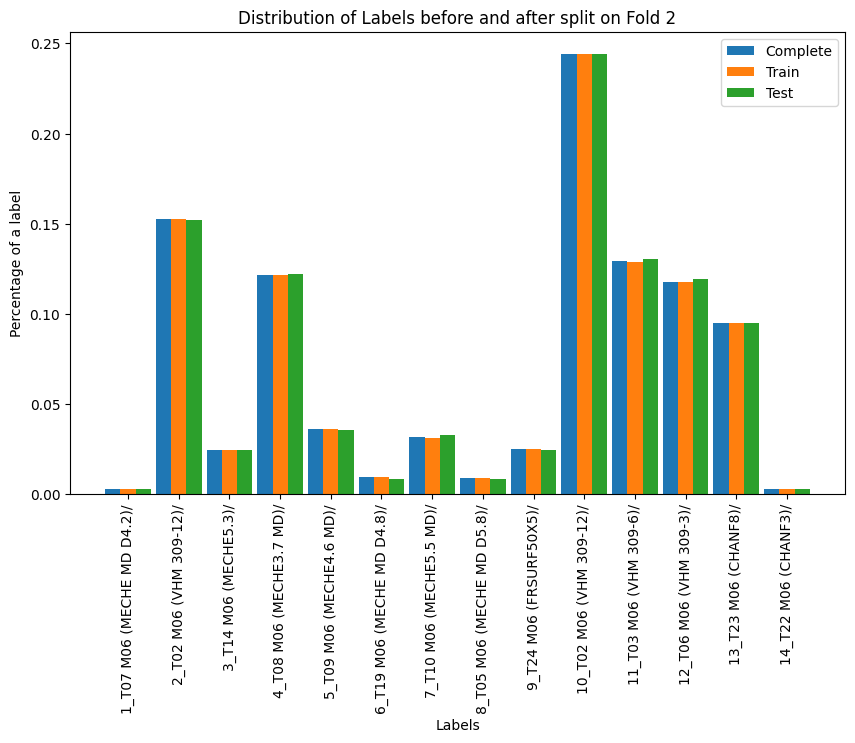

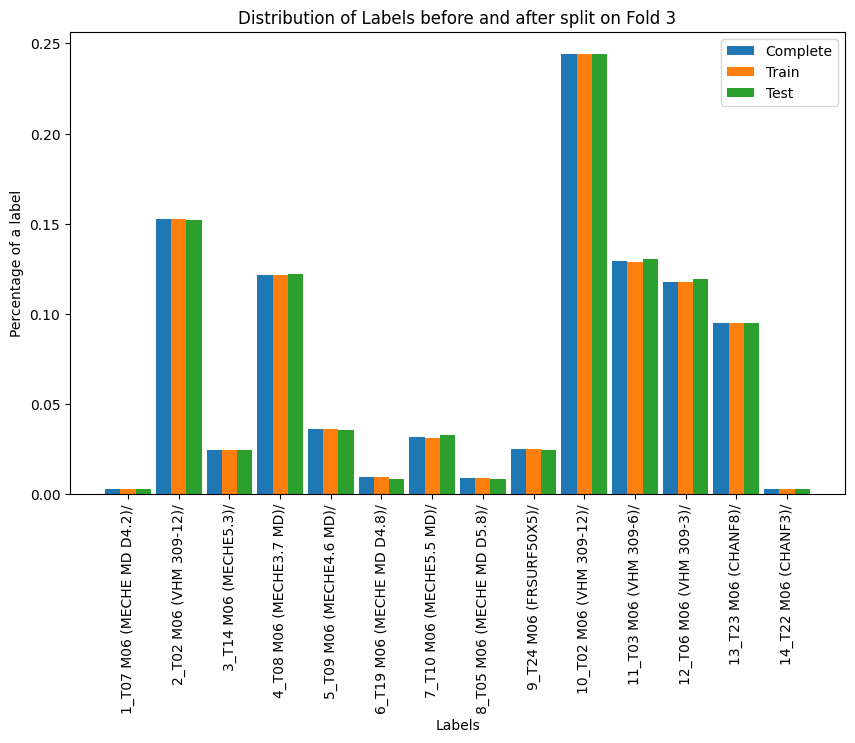

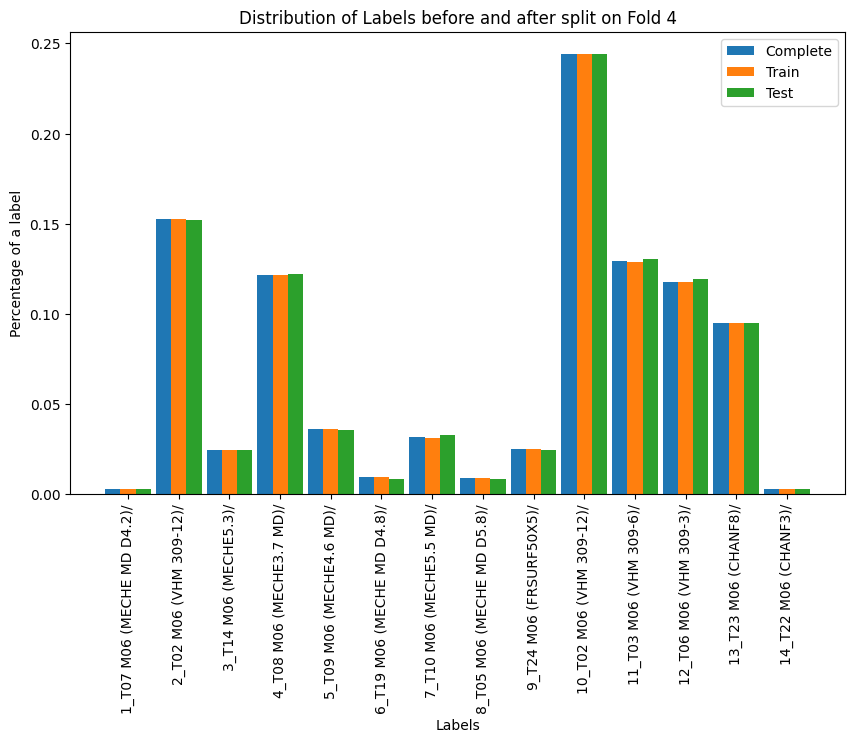

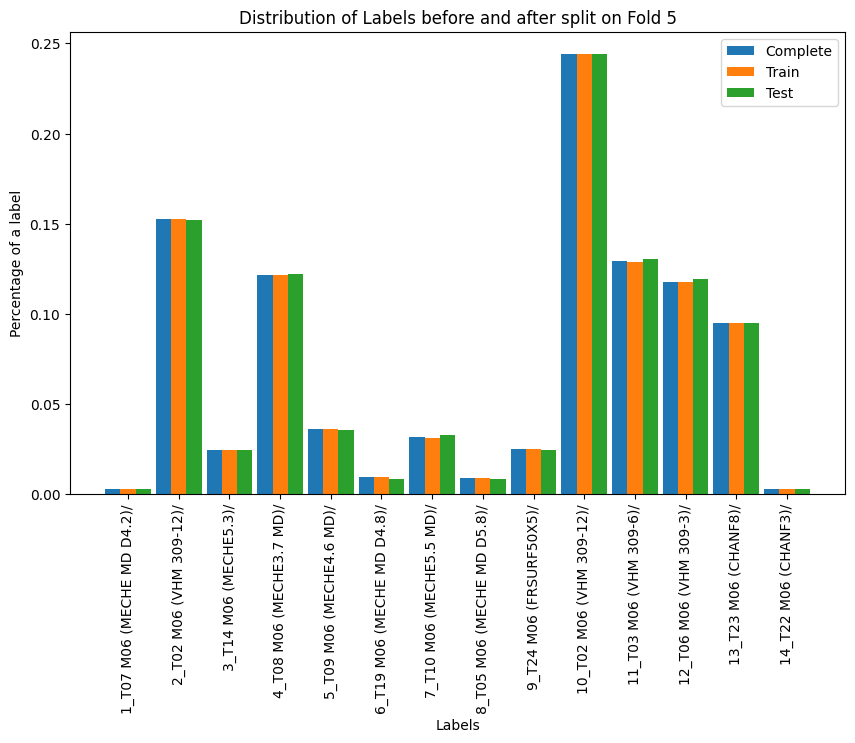

In [15]:
#Prepare a plot of distribution of data in each fold
import matplotlib.pyplot as plt
from matplotlib import colormaps
import matplotlib as mpl

for i in range(0,5):
    labels=[]
    for label in list(labels_count.index):
        labels.append(int(label.split("_")[0]))
    labelsCount=pd.DataFrame(labels_count)
    labelsCount['Label']=labels
    total = labelsCount['count'].sum()
    print(f"Total samples : {total}")
    labelsCount['count']=labelsCount['count']/total
    
    labelsCount.sort_values(ascending=True, inplace=True, by='Label')
    testDf.sort_values(ascending=True, inplace=True, by='Label')
    trainDf.sort_values(ascending=True, inplace=True, by='Label')
    X=list(testDf.index)
    X_axis = np.arange(len(X)) # the label locations
    
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.bar(X_axis - 0.3, labelsCount['count'], width=0.3, label = 'Complete', ) 
    plt.bar(X_axis , trainDf[f"Fold {i}"], width=0.3, label = 'Train') 
    plt.bar(X_axis + 0.3, testDf[f"Fold {i}"], width=0.3, label = 'Test') 
    
    #trainDf["Fold 0"].plot(kind='bar', ax=ax)
    #testDf["Fold 0"].plot(kind='bar', ax=ax)
    
    plt.xticks(X_axis, trainDf.index, rotation=90) 
    ax.set_title(f"Distribution of Labels before and after split on Fold {i+1}")
    ax.set_ylabel("Percentage of a label")
    ax.set_xlabel("Labels")
    ax.legend()

plt.show()
del label, labels, labelsCount,i, X_axis, X, total, ax, fig, colormaps

Fold 0 : 1474 training samples, 369 testing samples
Fold 1 : 1474 training samples, 369 testing samples
Fold 2 : 1474 training samples, 369 testing samples
Fold 3 : 1474 training samples, 369 testing samples
Fold 4 : 1474 training samples, 369 testing samples


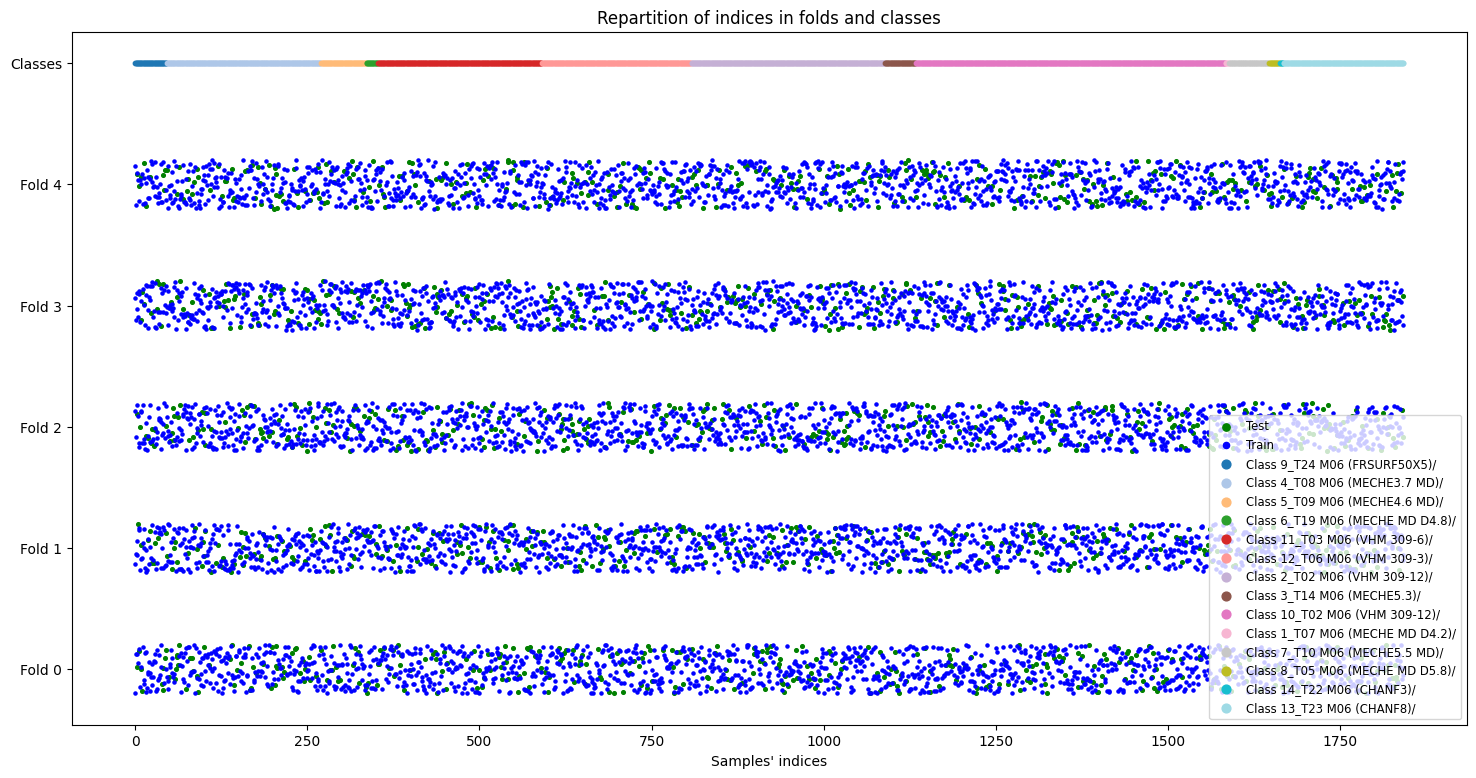

In [18]:
#Prepare a plot of distribution of data in each fold
# Création de la figure
fig, ax = plt.subplots(figsize=(18, 9))
# Labels des classes
Y=df['label']
labels=Y.unique()
# Nombre de folds + 1 pour la barre des classes
nbFolds = len(foldData) + 1

# Création des barres pour chaque fold
for i, (train_index, test_index) in enumerate(foldData):
    print(f"Fold {i} : {len(train_index)} training samples, {len(test_index)} testing samples")
    y_train = np.full(len(train_index), i) + np.random.uniform(-0.2, 0.2, len(train_index)) # Position des barres train
    y_test = np.full(len(test_index), i) + np.random.uniform(-0.2, 0.2, len(test_index)) # Position des barres test
    ax.scatter(test_index, y_test, color="green", s=7, label="Test" if i == 0 else "")
    ax.scatter(train_index, y_train, color="blue", s=5, label="Train" if i == 0 else "")

# Ajout de la dernière barre pour la distribution des classes
y_classes = np.full(len(Y), nbFolds - 1)  # Dernière ligne pour les classes

# Attribution d'une couleur par classe
tab20 = mpl.colormaps['tab20'].resampled(len(labels))
class_colors = {label: tab20.colors[i] for i, label in enumerate(labels)}

for label in labels:
    indices = np.where(Y == label)[0]
    y_classes = np.full(len(indices), nbFolds - 1) 
    ax.scatter(indices, y_classes, color=class_colors[label], s=10, label=f"Class {label}")

# Configuration de l'axe
ax.set_yticks(range(nbFolds))
ax.set_yticklabels([f"Fold {i}" for i in range(len(foldData))] + ["Classes"])
ax.set_xlabel("Samples' indices")
ax.set_title("Repartition of indices in folds and classes")
ax.legend(loc="lower right", markerscale=2, fontsize="small")

# Afficher la visualisation
plt.show()

del fig, ax, Y, nbFolds,  i, train_index, test_index, y_train, y_test, y_classes,  tab20, class_colors, indices, label, labels, colormaps

In [14]:
import os
import shutil
from tqdm import tqdm

srcDir="F:/Data_BachelorHES/5.Dataset_preparation/1.5sSegments/"
destDir="F:/Data_BachelorHES/5.Dataset_preparation/2.Folds/"
os.makedirs(destDir, exist_ok=True)
dictTrainTest={"Fold": [], "Type":[], "nb": [],"Label": [], 'condLabel':[], "Dir": [],  "Snd": [], "AccX": [], "AccY": [], "AccZ": []}
for i, (train_index, test_index) in enumerate(foldData):
    destFold=os.path.join(destDir, f"Fold_{i}_Train")
    os.makedirs(destFold, exist_ok=True)
    
    train=df.iloc[train_index, :].copy()
    train.sort_values(by='nb', inplace=True)

    for (index, row) in tqdm(train.iterrows(), desc=f"Fold {i} Train :", total=len(train)):
        srcPath=os.path.join(srcDir, row['dir'])
        dictTrainTest["Fold"].append(i)
        dictTrainTest["Type"].append("Train")
        dictTrainTest["nb"].append(row['nb'])
        dictTrainTest["Label"].append(row['label'])
        dictTrainTest["condLabel"].append(row['condensedLabel'])
        dictTrainTest["Dir"].append(f"Fold_{i}_Train")
        dictTrainTest["Snd"].append(row['sound'])
        dictTrainTest["AccX"].append(row['accelX'])
        dictTrainTest["AccY"].append(row['accelY'])
        dictTrainTest["AccZ"].append(row['accelZ'])
        if os.path.exists(os.path.join(srcPath, row['sound'])):
            shutil.copy(os.path.join(srcPath, row['sound']), os.path.join(destFold, row['sound']))
        if os.path.exists(os.path.join(srcPath, row['accelX'])):
            shutil.copy(os.path.join(srcPath, row['accelX']), os.path.join(destFold, row['accelX']))
        if os.path.exists(os.path.join(srcPath, row['accelY'])):
            shutil.copy(os.path.join(srcPath, row['accelY']), os.path.join(destFold, row['accelY']))
        if os.path.exists(os.path.join(srcPath, row['accelZ'])):
            shutil.copy(os.path.join(srcPath, row['accelZ']), os.path.join(destFold, row['accelZ']))


    destFold=os.path.join(destDir, f"Fold_{i}_Test")
    os.makedirs(destFold, exist_ok=True)
    
    test=df.iloc[test_index, :].copy()
    test.sort_values(by='nb', inplace=True)
    
    for (index, row) in tqdm(test.iterrows(), desc=f"Fold {i} Test :", total=len(test)):
        srcPath=os.path.join(srcDir, row['dir'])
        dictTrainTest["Fold"].append(i)
        dictTrainTest["Type"].append("Test")
        dictTrainTest["nb"].append(row['nb'])
        dictTrainTest["Label"].append(row['label'])
        dictTrainTest["condLabel"].append(row['condensedLabel'])
        dictTrainTest["Dir"].append(f"Fold_{i}_Test")
        dictTrainTest["Snd"].append(row['sound'])
        dictTrainTest["AccX"].append(row['accelX'])
        dictTrainTest["AccY"].append(row['accelY'])
        dictTrainTest["AccZ"].append(row['accelZ'])
        if os.path.exists(os.path.join(srcPath, row['sound'])):
            shutil.copy(os.path.join(srcPath, row['sound']), os.path.join(destFold, row['sound']))
        if os.path.exists(os.path.join(srcPath, row['accelX'])):
            shutil.copy(os.path.join(srcPath, row['accelX']), os.path.join(destFold, row['accelX']))
        if os.path.exists(os.path.join(srcPath, row['accelY'])):
            shutil.copy(os.path.join(srcPath, row['accelY']), os.path.join(destFold, row['accelY']))
        if os.path.exists(os.path.join(srcPath, row['accelZ'])):
            shutil.copy(os.path.join(srcPath, row['accelZ']), os.path.join(destFold, row['accelZ']))
 
del srcDir, destDir, i, train_index, test_index, foldData, destFold, train, index, row, srcPath, test   


Fold 4 Test :: 100%|██████████| 369/369 [05:11<00:00,  1.18it/s]


In [15]:
dfTrainTest=pd.DataFrame(dictTrainTest)
dfTrainTest.to_csv("F:/Data_BachelorHES/DataSet_CNC/segments/DataSetsFolds/FoldData.csv", index=True)
del dictTrainTest